# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [ ]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
brian,filmed in at tuacahn outdoor amphi ater utah...,Brian Regan
dave,original air date november ladies gentl...,Dave Chappelle
drew,this is latest i ve stayed up in a long tim...,Drew Michael
jim,thank thank oh my gosh thank so much tha...,Jim Gaffigan
kevin,streaming on netflix from november yo what...,Kevin Hart
loius,recorded at madison square garden on august ...,Louis C K
ronny,ladies gentlemen ronny chieng thank tha...,Ronny Cheing
tom,ladies gentlemen tom papa thank thank ...,Tom Papa


In [ ]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
brian,filmed in at tuacahn outdoor amphi ater utah...,Brian Regan,0.126977,0.467596
dave,original air date november ladies gentl...,Dave Chappelle,0.083933,0.540011
drew,this is latest i ve stayed up in a long tim...,Drew Michael,0.039995,0.575483
jim,thank thank oh my gosh thank so much tha...,Jim Gaffigan,0.103438,0.518666
kevin,streaming on netflix from november yo what...,Kevin Hart,0.141576,0.471998
loius,recorded at madison square garden on august ...,Louis C K,0.068288,0.553415
ronny,ladies gentlemen ronny chieng thank tha...,Ronny Cheing,0.127225,0.465350
tom,ladies gentlemen tom papa thank thank ...,Tom Papa,0.105406,0.543220


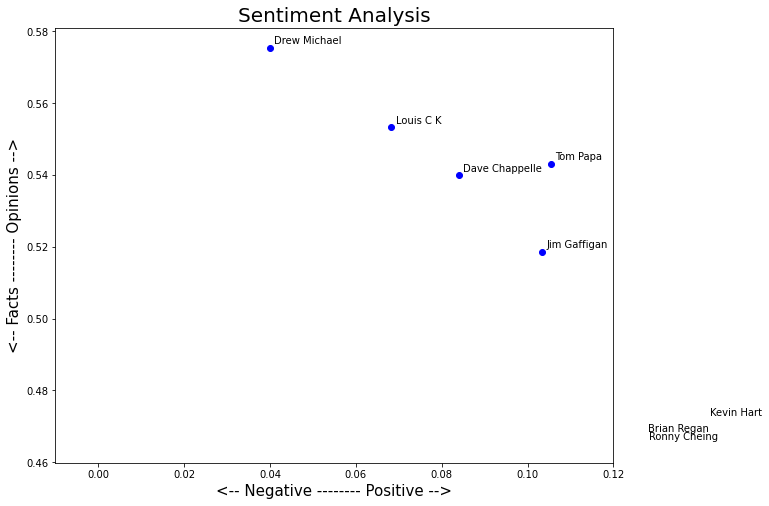

In [ ]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [ ]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [ ]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
brian,filmed in at tuacahn outdoor amphi ater utah...,Brian Regan,0.126977,0.467596
dave,original air date november ladies gentl...,Dave Chappelle,0.083933,0.540011
drew,this is latest i ve stayed up in a long tim...,Drew Michael,0.039995,0.575483
jim,thank thank oh my gosh thank so much tha...,Jim Gaffigan,0.103438,0.518666
kevin,streaming on netflix from november yo what...,Kevin Hart,0.141576,0.471998
loius,recorded at madison square garden on august ...,Louis C K,0.068288,0.553415
ronny,ladies gentlemen ronny chieng thank tha...,Ronny Cheing,0.127225,0.465350
tom,ladies gentlemen tom papa thank thank ...,Tom Papa,0.105406,0.543220


In [ ]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['filmed in at   tuacahn outdoor amphi ater utah  ladies   gentlemen please welcome brian regan thank   thank   very much everybody thank   thank   very very much well let s get   gray hair out of   way because if i don t   won t listen to a word i say for an hour   ll be out  re did   know anything about   gray hair  i m just as befuddled as    i don t know what happened ei r covid h  i went into hibernation   came out a senior c izen    s just as well i was never comfortable in   haircolor aisle anyway   always have to pretend like   re  re for someone else women huh  i like   difference in hair color names between women   men women have hair color names like ruby fusion chocolate cherry butterscotch men s hair color brown black light brown dark black for men   is   entire color spectrum i don t know i m at   age where i wake up   first thing i do is try to remember what doctor i m going to   day ah   dermatologist because of   splotch on my back i don t want to sound like i m bragg

In [ ]:
# The list has 10 elements, one for each transcript
len(list_pieces)

8

In [ ]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [ ]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.10182786511733881,
  0.03222222222222222,
  0.1525822131085289,
  0.09536340852130325,
  -0.010588972431077695,
  0.1455395794681509,
  0.2484188034188034,
  0.05778635778635779,
  0.14192708333333337,
  0.2835192743764172],
 [0.2297643097643098,
  0.12902930402930407,
  0.014693877551020426,
  0.11807773109243695,
  -0.06988298160173156,
  0.1988121960344183,
  0.11338259441707722,
  0.04062397372742202,
  0.022323129251700685,
  0.06426767676767678],
 [-0.03047619047619048,
  -0.0591690009337068,
  0.0554430229803364,
  0.17053454715219424,
  0.1372953561589925,
  0.20707836683864078,
  0.018053369189732823,
  -0.11741982507288629,
  0.11594890958098504,
  -0.11756428371011708],
 [0.07346301359459255,
  0.09997728797024574,
  0.1037356958287191,
  0.07432346109175375,
  0.16701704545454543,
  0.08522840007215006,
  0.19715710215710214,
  0.07593826500297085,
  0.06830144936762583,
  0.038039867109634556],
 [0.11293968253968255,
  0.0011395005960223308,
  0.08398293650793652,
  0.

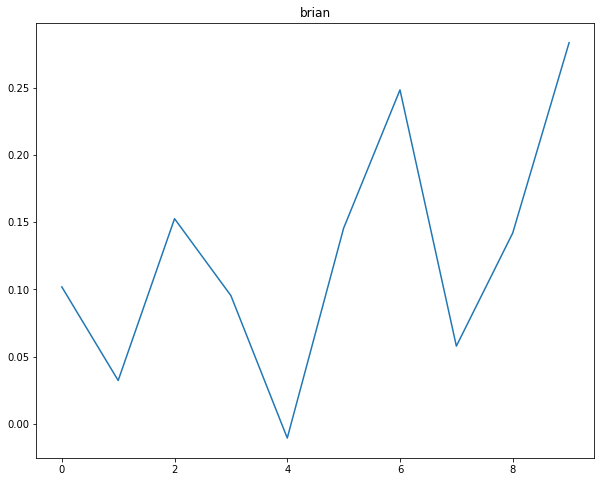

In [ ]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

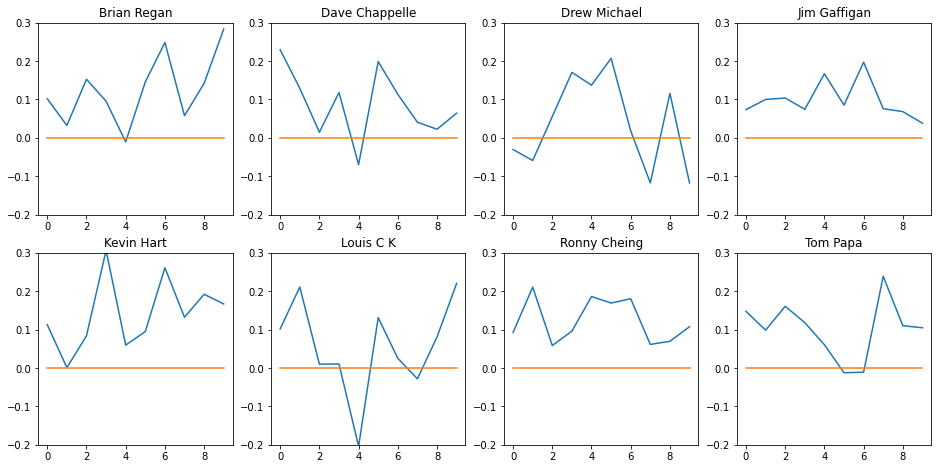

In [ ]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

Ali Wong stays generally positive throughout her routine. Similar comedians are Louis C.K. and Mike Birbiglia.

On the other hand, you have some pretty different patterns here like Bo Burnham who gets happier as time passes and Dave Chappelle who has some pretty down moments in his routine.

## Additional Exercises

1. Modify the number of sections the comedy routine is split into and see how the charts over time change.

In [ ]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=6):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [ ]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
brian,filmed in at tuacahn outdoor amphi ater utah...,Brian Regan,0.126977,0.467596
dave,original air date november ladies gentl...,Dave Chappelle,0.083933,0.540011
drew,this is latest i ve stayed up in a long tim...,Drew Michael,0.039995,0.575483
jim,thank thank oh my gosh thank so much tha...,Jim Gaffigan,0.103438,0.518666
kevin,streaming on netflix from november yo what...,Kevin Hart,0.141576,0.471998
loius,recorded at madison square garden on august ...,Louis C K,0.068288,0.553415
ronny,ladies gentlemen ronny chieng thank tha...,Ronny Cheing,0.127225,0.465350
tom,ladies gentlemen tom papa thank thank ...,Tom Papa,0.105406,0.543220


In [ ]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['filmed in at   tuacahn outdoor amphi ater utah  ladies   gentlemen please welcome brian regan thank   thank   very much everybody thank   thank   very very much well let s get   gray hair out of   way because if i don t   won t listen to a word i say for an hour   ll be out  re did   know anything about   gray hair  i m just as befuddled as    i don t know what happened ei r covid h  i went into hibernation   came out a senior c izen    s just as well i was never comfortable in   haircolor aisle anyway   always have to pretend like   re  re for someone else women huh  i like   difference in hair color names between women   men women have hair color names like ruby fusion chocolate cherry butterscotch men s hair color brown black light brown dark black for men   is   entire color spectrum i don t know i m at   age where i wake up   first thing i do is try to remember what doctor i m going to   day ah   dermatologist because of   splotch on my back i don t want to sound like i m bragg

In [ ]:
# The list has 10 elements, one for each transcript
len(list_pieces)

8

In [ ]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

6

In [ ]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.0763647755753019,
  0.11481437754165028,
  0.027523809523809516,
  0.21301910732945215,
  0.040126050420168057,
  0.25749743983614953],
 [0.2214301747635081,
  0.046314699792960656,
  -0.0015366131044097146,
  0.19710661812934543,
  0.04857142857142857,
  0.03813185425685426],
 [-0.019878048780487805,
  0.0527489884842826,
  0.1352045081355426,
  0.12602813852813852,
  -0.052108938315834866,
  -0.01922665811554702],
 [0.10558702889411549,
  0.08541276624609959,
  0.1328056867375049,
  0.08840085491028887,
  0.11082124318582652,
  0.09362599206349208],
 [0.0659318891491023,
  0.11471375755689478,
  0.16008609693877562,
  0.19200755765973154,
  0.18841704764601963,
  0.1446432696432696],
 [0.12367784992784993,
  0.10176299595721079,
  -0.13249836803408227,
  0.08355585934533295,
  0.029789398842796914,
  0.1490119355235634],
 [0.18714126421918637,
  0.06818388876081184,
  0.15357402078958968,
  0.16731006367370002,
  0.10703539653870778,
  0.06912440261064114],
 [0.10813105545248404,

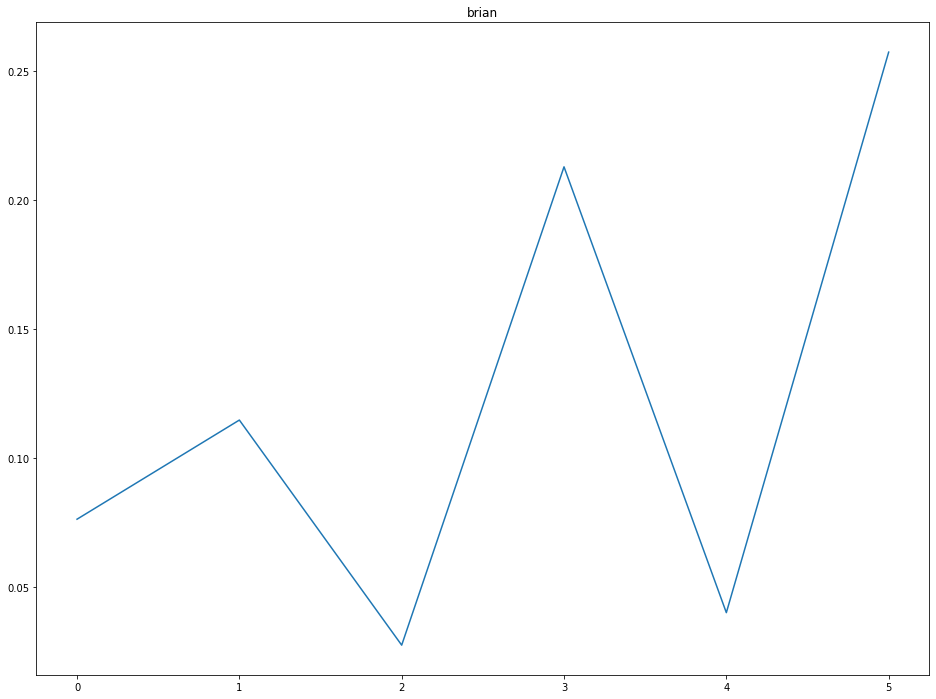

In [ ]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

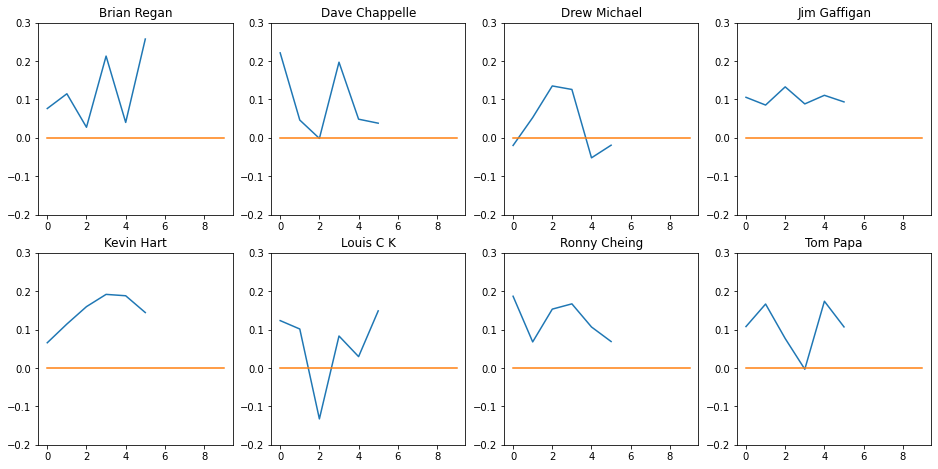

In [ ]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

Brian, Jim, Kevin, Ronny, Tom and Dave has positive polarity; Drew started from negative polarity, remained positive for maximum duration and then again became negatve; Louis started from positive then became negative and then again became positive.